# Advanced Convolutional Neural Networks (CNN) - 1
- Objective: try different structures of CNNs
- Note: examples are performed on **i5 7600 + gtx 1060 6GB **

## Deeper Networks
- It is one of definite trends that CNN models submitted to ILSVRC are getting deeper and deeper
<img src="https://cdn-images-1.medium.com/max/756/1*Io-I-fOM0jGftDb_nne4KQ.png" style="width: 600px"/>

<br>
- Deeper networks are able to learn more "abstract" representations by comprising more operations and nonlinearities 
- However, they are difficult and costly to train and prone to overfitting

<img src="http://cs231n.github.io/assets/cnnvis/filt1.jpeg" style="width: 400px"/>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

## Load Dataset
- MNIST Dataset
- Doc: https://keras.io/datasets/

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
# reshaping X data: (n, 28, 28) => (n, 28, 28, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [5]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


## 0. Basic CNN model
- Basic CNN similar to what we made before
- One convolutional & pooling layer

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [8]:
def basic_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [9]:
model = basic_cnn()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 50)        500       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9800)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                490050    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 491,060
Trainable params: 491,060
Non-trainable params: 0
__________________________________________________

In [12]:
%%time
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.2, epochs = 10, verbose = 1)

Epoch 1/10
188/188 [==============================] - 27s 144ms/step - loss: 0.0375 - accuracy: 0.9887 - val_loss: 0.0809 - val_accuracy: 0.9779
Epoch 2/10
188/188 [==============================] - 27s 143ms/step - loss: 0.0240 - accuracy: 0.9934 - val_loss: 0.0783 - val_accuracy: 0.9778
Epoch 3/10
188/188 [==============================] - 27s 143ms/step - loss: 0.0175 - accuracy: 0.9955 - val_loss: 0.0798 - val_accuracy: 0.9788
Epoch 4/10
188/188 [==============================] - 27s 143ms/step - loss: 0.0133 - accuracy: 0.9967 - val_loss: 0.0838 - val_accuracy: 0.9778
Epoch 5/10
188/188 [==============================] - 27s 143ms/step - loss: 0.0102 - accuracy: 0.9976 - val_loss: 0.0859 - val_accuracy: 0.9783
Epoch 6/10
188/188 [==============================] - 27s 143ms/step - loss: 0.0078 - accuracy: 0.9984 - val_loss: 0.0871 - val_accuracy: 0.9779
Epoch 7/10
188/188 [==============================] - 27s 143ms/step - loss: 0.0060 - accuracy: 0.9986 - val_loss: 0.0915 - val_ac

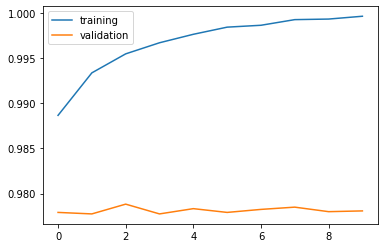

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [16]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0973 - accuracy: 0.9793


In [17]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9793000221252441


## 1. Deep CNN - 1
- Deeper network with 6 convolutional layers and 3 pooling layers
- Note that two (3x3) convolutional layers are stacked
    - It is equivalent to using one (5X5) convolutional layer, but with fewer parameters
    - Similar to the structured used in VGGnet

In [18]:
def deep_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [19]:
model = deep_cnn()

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 50)        22550     
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 50)        22550     
_________________________________________________________________
activation_3 (Activation)    (None, 14, 14, 50)       

In [21]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 10, verbose = 1)

Epoch 1/10
960/960 [==============================] - 300s 313ms/step - loss: 0.1896 - accuracy: 0.9412 - val_loss: 0.0490 - val_accuracy: 0.9854
Epoch 2/10
960/960 [==============================] - 293s 305ms/step - loss: 0.0519 - accuracy: 0.9835 - val_loss: 0.0494 - val_accuracy: 0.9852
Epoch 3/10
960/960 [==============================] - 292s 304ms/step - loss: 0.0432 - accuracy: 0.9870 - val_loss: 0.0491 - val_accuracy: 0.9858
Epoch 4/10
960/960 [==============================] - 293s 305ms/step - loss: 0.0364 - accuracy: 0.9889 - val_loss: 0.0451 - val_accuracy: 0.9863
Epoch 5/10
960/960 [==============================] - 292s 305ms/step - loss: 0.0306 - accuracy: 0.9907 - val_loss: 0.0530 - val_accuracy: 0.9837
Epoch 6/10
960/960 [==============================] - 293s 305ms/step - loss: 0.0271 - accuracy: 0.9916 - val_loss: 0.0353 - val_accuracy: 0.9893
Epoch 7/10
960/960 [==============================] - 293s 305ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0399 -

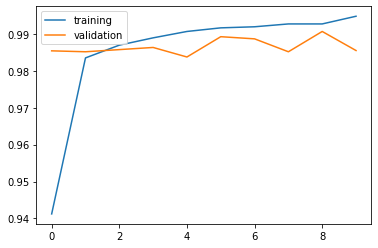

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training is rather unstable; accuracy falling down after around 80 epochs

In [23]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 15s 48ms/step - loss: 0.0451 - accuracy: 0.9872


In [24]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9872000217437744


## 2. Deep CNN - 2
- Measures used to ameliorate the performance of MLPs are employed
    - Weight Initialization
    - Batch Normalization
    - Dropout

In [25]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [26]:
def deep_cnn_advanced():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [27]:
model = deep_cnn_advanced()

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 50)        200       
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 50)        22550     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
activation_8 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 50)       

In [29]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 10, verbose = 1)

Epoch 1/10
960/960 [==============================] - 348s 363ms/step - loss: 0.3679 - accuracy: 0.8820 - val_loss: 0.0768 - val_accuracy: 0.9783
Epoch 2/10
960/960 [==============================] - 349s 364ms/step - loss: 0.1215 - accuracy: 0.9636 - val_loss: 0.0327 - val_accuracy: 0.9897
Epoch 3/10
960/960 [==============================] - 350s 365ms/step - loss: 0.0900 - accuracy: 0.9732 - val_loss: 0.0579 - val_accuracy: 0.9843
Epoch 4/10
960/960 [==============================] - 350s 365ms/step - loss: 0.0739 - accuracy: 0.9776 - val_loss: 0.0665 - val_accuracy: 0.9821
Epoch 5/10
960/960 [==============================] - 350s 365ms/step - loss: 0.0652 - accuracy: 0.9808 - val_loss: 0.0438 - val_accuracy: 0.9889
Epoch 6/10
960/960 [==============================] - 355s 370ms/step - loss: 0.0567 - accuracy: 0.9825 - val_loss: 0.0603 - val_accuracy: 0.9846
Epoch 7/10
960/960 [==============================] - 349s 364ms/step - loss: 0.0484 - accuracy: 0.9856 - val_loss: 0.0367 -

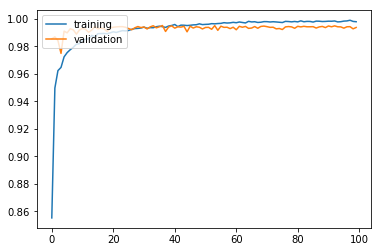

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Stable and comparable result is obtained

In [30]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 17s 56ms/step - loss: 0.0264 - accuracy: 0.9914


In [31]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9914000034332275


## 3. Deep CNN - 3
- One of the ways to reduce the number of parameters in a model is proposed in Min et al 2013 (https://arxiv.org/abs/1312.4400)
- Namely "Network In Network (NIN)" or "1 X 1 convolutions"
    - Method is simple - adding convolutional layers after other convolutional layers
    - Has the effect of reducing the dimensionality (depth) of image space, effectively reducing the number of parameters
    
<img src="https://raw.githubusercontent.com/iamaaditya/iamaaditya.github.io/master/images/conv_arithmetic/full_padding_no_strides_transposed_small.gif" style="width: 200px"/>

<br>
- GoogleNet architecture (Inception) utilizes NIN structure

<img src="https://raw.githubusercontent.com/iamaaditya/iamaaditya.github.io/master/images/inception_1x1.png" style="width: 800px"/>

In [32]:
def deep_cnn_advanced_nin():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model 

In [33]:
model = deep_cnn_advanced_nin()

In [34]:
model.summary()    # note that the number of parameters are greatly reduced

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
activation_13 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 50)        22550     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 25)        1275      
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 25)        100       
_________________________________________________________________
activation_14 (Activation)   (None, 28, 28, 25)       

In [35]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 10, verbose = 1)

Epoch 1/10
960/960 [==============================] - 317s 330ms/step - loss: 0.4332 - accuracy: 0.8612 - val_loss: 0.0894 - val_accuracy: 0.9717
Epoch 2/10
960/960 [==============================] - 312s 325ms/step - loss: 0.1419 - accuracy: 0.9578 - val_loss: 0.1064 - val_accuracy: 0.9716
Epoch 3/10
960/960 [==============================] - 316s 329ms/step - loss: 0.1058 - accuracy: 0.9690 - val_loss: 0.0532 - val_accuracy: 0.9843
Epoch 4/10
960/960 [==============================] - 309s 322ms/step - loss: 0.0871 - accuracy: 0.9745 - val_loss: 0.0701 - val_accuracy: 0.9787
Epoch 5/10
960/960 [==============================] - 313s 327ms/step - loss: 0.0764 - accuracy: 0.9771 - val_loss: 0.0467 - val_accuracy: 0.9876
Epoch 6/10
960/960 [==============================] - 307s 319ms/step - loss: 0.0723 - accuracy: 0.9785 - val_loss: 0.0367 - val_accuracy: 0.9898
Epoch 7/10
960/960 [==============================] - 308s 321ms/step - loss: 0.0635 - accuracy: 0.9808 - val_loss: 0.0796 -

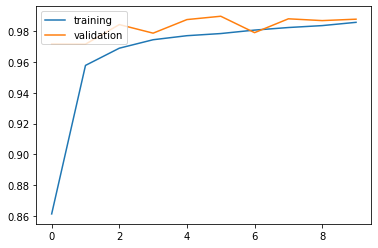

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Fairly stable result even with smaller number of parameters

In [37]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 16s 51ms/step - loss: 0.0409 - accuracy: 0.9892


In [38]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9891999959945679
